# Mnist dataset 

doing the handwritten digits recognition with the mnist dataset 

#baseline 


doing the image recognition for `3 and 7`

In [1]:
!nvidia-smi

Tue Jun 29 11:36:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P0    N/A /  N/A |    405MiB /  4046MiB |     62%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# !pip install fastbook 

from fastai import * 
from fastai.vision.all import *
from fastbook import *

/home/som/.local/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
Path.BASE_PATH = path 
path

Path('.')

In [5]:
path.ls() # shows the what's in the path 

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [6]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [7]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
np.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(im3)[4:10,4:10] # pytorch version of the same array 

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
# pytorch tensors have the GPU provides the computation advantage 


In [12]:
# grabbing the tensor 3 and converting to the pandas dataframe 
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,5:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
# making the lists of all of the 7's 

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

<AxesSubplot:>

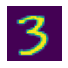

In [14]:
show_image(three_tensors[1])

In [15]:
three_tensors[1].shape

torch.Size([28, 28])

In [16]:
type(three_tensors)

list

In [17]:
# converting the list of iamges ( which are 3 and 7 ) into tensors 
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [18]:
# rank is the number of dimensions or shape of the tensor 


In [19]:
# stacked_threes.mean()  # average pixel of the whole cube 
# stacked_threes.mean(0) # average pixel across the 0th axis  

<AxesSubplot:>

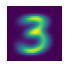

In [20]:
show_image(stacked_threes.mean(0))

<AxesSubplot:>

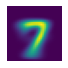

In [21]:
show_image(stacked_sevens.mean(0))

In [22]:
dist_3_abs = (stacked_threes[1] - stacked_threes.mean(0)).abs().mean()
dist_3_sqr = ((stacked_threes[1]-stacked_threes.mean(0))**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [23]:
dist_7_abs = (stacked_threes[1] - stacked_sevens.mean(0)).abs().mean()
dist_7_sqr = ((stacked_threes[1]-stacked_threes.mean(0))**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.2021))

as we see above the absolute and squared error is less with three so we can conclude that the stacked image is of 3 and it's relatively greater for 7_abs and 7_sqr

In [24]:
# for finding the type of tensor in fast ai is quite different than that of the type of tensors in the python 
# in python it's like type(tensor) but in fast ai it's like tensor.type()
dist_7_abs.type()

'torch.FloatTensor'

In [25]:
# checking how our model is performing on the validation data 
# 1.st loading the data 
valid_3_tens  = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()])
valid_3_tens = valid_3_tens.float()/255.

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()])
valid_7_tens = valid_7_tens.float()/255.
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [26]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [27]:
valid_3_dist = mnist_distance(valid_3_tens,stacked_threes.mean(0))

In [28]:
valid_3_dist, valid_3_dist.shape

(tensor([0.1248, 0.1469, 0.1331,  ..., 0.1578, 0.1369, 0.1518]),
 torch.Size([1010]))

In [29]:
def is_3(x): return mnist_distance(x,stacked_threes.mean(0)) < mnist_distance(x,stacked_sevens.mean(0))

In [30]:
is_3(valid_3_tens[4])

tensor(True)

In [31]:
is_3(valid_7_tens[5]).float()

tensor(0.)

In [32]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False, False, False])

In [33]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [34]:
# here we've model of the 95% accuracy 

# working with the gradients 

1. initialize the random gradients 
2. for each image , use these weights to predict wheather it appers to be a three or seven 
3. Based on these predictions , calculate how good the model is ( it's loss ) 
4. calculate the gradient, which measures for each weiight how changing the weight would change the loss 
5. step , all weights based on the calculations 
6. repeat whole process from 2nd step 
7. do it until you are satisfied by the results 

## init ----> predict ------> loss ---> gradient ---> step repeat ------> stop 

In [35]:
# loss will be small when the performance of the model is good 


In [36]:
def f(x) : return x**2

In [37]:
# plot_function(f,'x','x**2') # 1st parar is the function name itself 2nd is the x label and 3rd is the y label 

/home/som/.local/lib/python3.8/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


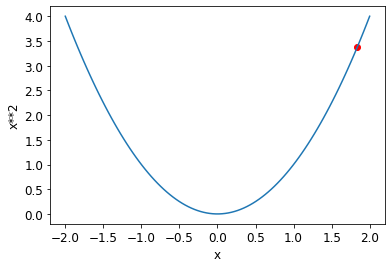

In [38]:
# here we are trying to find the lowest point in the loss fun  f 
plot_function(f,'x','x**2')
value = 1.84 #@param {type:"slider", min:-2, max:2, step:0.01}
plt.scatter(value,f(value),color = 'red') 

In [39]:
# WE for modifying the funcion later and to tell pytorch to remember that you have to do this some derivative and calculationns later 
xt = tensor(3.).requires_grad_() # underscroll at the end of function in pytorch means in place modification it modifies the value which you are gonna pass 

In [40]:
# it keeps track of all the computitions we do in order to calculate derivative later 
yt = f(xt)
yt # here you have noticed that tensor gives the grad_fn also so we can give the derivative out here by using backward() method 

tensor(9., grad_fn=<PowBackward0>)

In [41]:
yt.backward() # for telling pytorch to calculate the derivative 

In [42]:
xt.grad # getting result from dertivative function where we have declared requires_grad 

tensor(6.)

# working with the gradients 

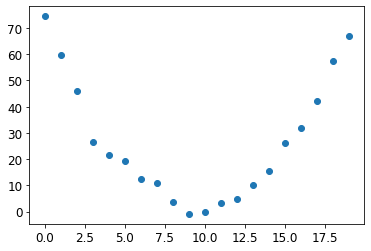

In [43]:
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed)
def f(t,params): 
  a,b,c = params 
  return a*(t**2) + (b*t) + c 
  

In [44]:

def mse(preds,targets):return ((preds-targets) ** 2).mean().sqrt()


In [45]:

params = torch.randn(3).requires_grad_()
orig_params = params.clone()
preds = f(time,params)


In [46]:
def show_preds(preds,ax = None):
  if ax is None : ax = plt.subplots()[1]
  ax.scatter(time,speed)
  ax.scatter(time,to_np(preds),color = 'red')
  ax.set_ylim(-300,1000)


tensor(160.4228, grad_fn=<SqrtBackward>)

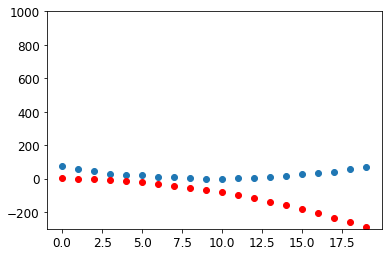

In [47]:
show_preds(preds)
loss = mse(preds,speed)
loss 
loss.backward()
params.grad
params.grad * 1e-5
params 
lr = 1e-5 
params.data -= lr * params.grad.data
params.grad = None
preds = f(time,params)
mse(preds,speed)


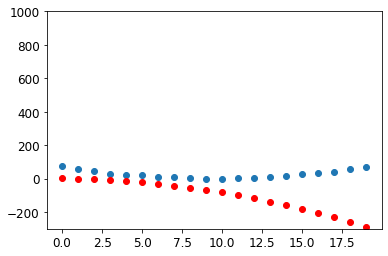

In [48]:
show_preds(preds)


In [49]:
def apply_step(params, prn = True):
    preds = f(time,params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds
for i in range(10): apply_step(params)

160.42279052734375
160.14772033691406
159.87269592285156
159.59768676757812
159.3227081298828
159.04774475097656
158.7728271484375
158.4979248046875
158.22305297851562
157.9481964111328


if we wanted to find the minima of the gradients or functions we will have to define the speed at which we are gonna take a step and set the learning rate 

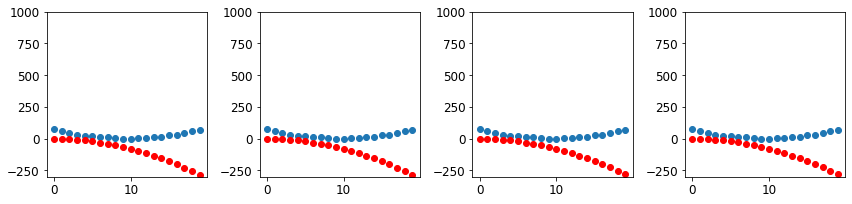

In [50]:
_, axs = plt.subplots(1,4,figsize = (12,3))
for ax in axs : show_preds(apply_step(params,False),ax)
plt.tight_layout()

# MNIST loss function 

In [51]:
# we've to calculate the gradient where the difference is really small 

In [52]:
# if we change the param for small amount then there will be no change in the accuracy of the

# my own function finding sgd 


In [53]:
def f(x,params): 
    a,b,c = params 
    return a*(x**2) + b*x + c 

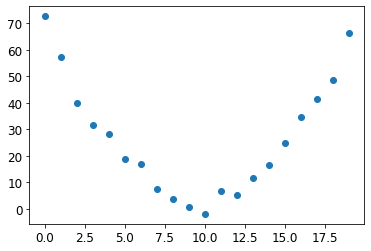

In [54]:
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed)

In [55]:
params = torch.randn(3).requires_grad_()

In [59]:
original_params = params.clone()

In [70]:
print(original_params)

tensor([ 0.6863,  0.4679, -0.2049], grad_fn=<CloneBackward>)


In [71]:
preds = f(time,original_params)

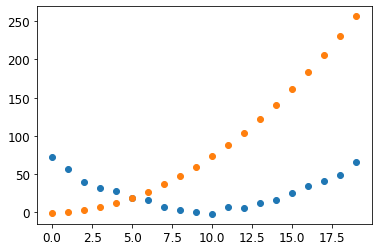

In [79]:
plt.scatter(time,speed)
plt.scatter(time, preds.detach().numpy())

In [80]:
def mse(preds,target):
    return ((target-preds)**2).mean().sqrt()

In [83]:
mse(preds,speed)
lr = 1e-3

In [87]:
def apply_steps(params,prn = True):
    preds = f(time,params)
    loss = mse(time,preds)
    loss.backward()
    params.data -= lr * params.grad.data  
    params.grad = None 
    if prn: print(loss.item())
    return preds



In [88]:
for i in range(10):
    apply_steps(params)

81.009765625
52.77605438232422
24.573091506958008
4.046715259552002
22.002222061157227
6.458049297332764
21.086477279663086
7.340133190155029
20.409852981567383
7.995513916015625
